# **LTST** 

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_2048_1024_128-10.json"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))  # True = s2s, False = s2v
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.LSTM(64, return_sequences=True))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.LSTM(32, return_sequences=False))
    model.add(keras.layers.Dropout(0.1))


    # dense layer
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2])  # could be train, validation, test
    model = build_model(input_shape)
    

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot model summary
    model.summary()

    # plot accuracy and error over epochs
    plot_history(history)
    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix, without normalization')
    plt.show()


# **LTSM FEATURES** 

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_FEATURES-10.json"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))  # True = s2s, False = s2v
    model.add(keras.layers.Dropout(0.05))
    model.add(keras.layers.LSTM(32, return_sequences=False))
    model.add(keras.layers.Dropout(0.05))


    # dense layer
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2])  # could be train, validation, test
    model = build_model(input_shape)
    

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.summary()

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)
    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix')
    plt.show()


Epoch 1/100
1499/1499 [==============================] - 86s 57ms/step - loss: 1.7381 - accuracy: 0.3608 - val_loss: 1.6082 - val_accuracy: 0.4200
Epoch 2/100
1499/1499 [==============================] - 85s 57ms/step - loss: 1.5890 - accuracy: 0.4306 - val_loss: 1.5586 - val_accuracy: 0.4289
Epoch 3/100
1499/1499 [==============================] - 85s 57ms/step - loss: 1.5173 - accuracy: 0.4573 - val_loss: 1.4856 - val_accuracy: 0.4596
Epoch 4/100
1499/1499 [==============================] - 85s 56ms/step - loss: 1.4576 - accuracy: 0.4807 - val_loss: 1.4639 - val_accuracy: 0.4724
Epoch 5/100
1499/1499 [==============================] - 85s 57ms/step - loss: 1.4107 - accuracy: 0.4971 - val_loss: 1.4136 - val_accuracy: 0.4869
Epoch 6/100
1499/1499 [==============================] - 85s 57ms/step - loss: 1.3688 - accuracy: 0.5137 - val_loss: 1.3972 - val_accuracy: 0.4962
Epoch 7/100
1499/1499 [==============================] - 85s 57ms/step - loss: 1.3339 - accuracy: 0.5268 - val_loss: 1

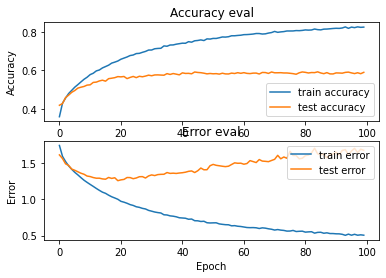

Confusion matrix, without normalization
[[1026   89   17   55   32   68  106   26]
 [ 103  593  153   97  175  124  158  141]
 [  18  109  886  121   54  104   39  239]
 [  43   93   94  780   85   97   90  219]
 [  39  149   71   77  931   41   54   99]
 [  80   99  104   53   50  952   91   55]
 [ 103  107   27  111   43   81  948   98]
 [  17   56   98  168   59   46   86  961]]


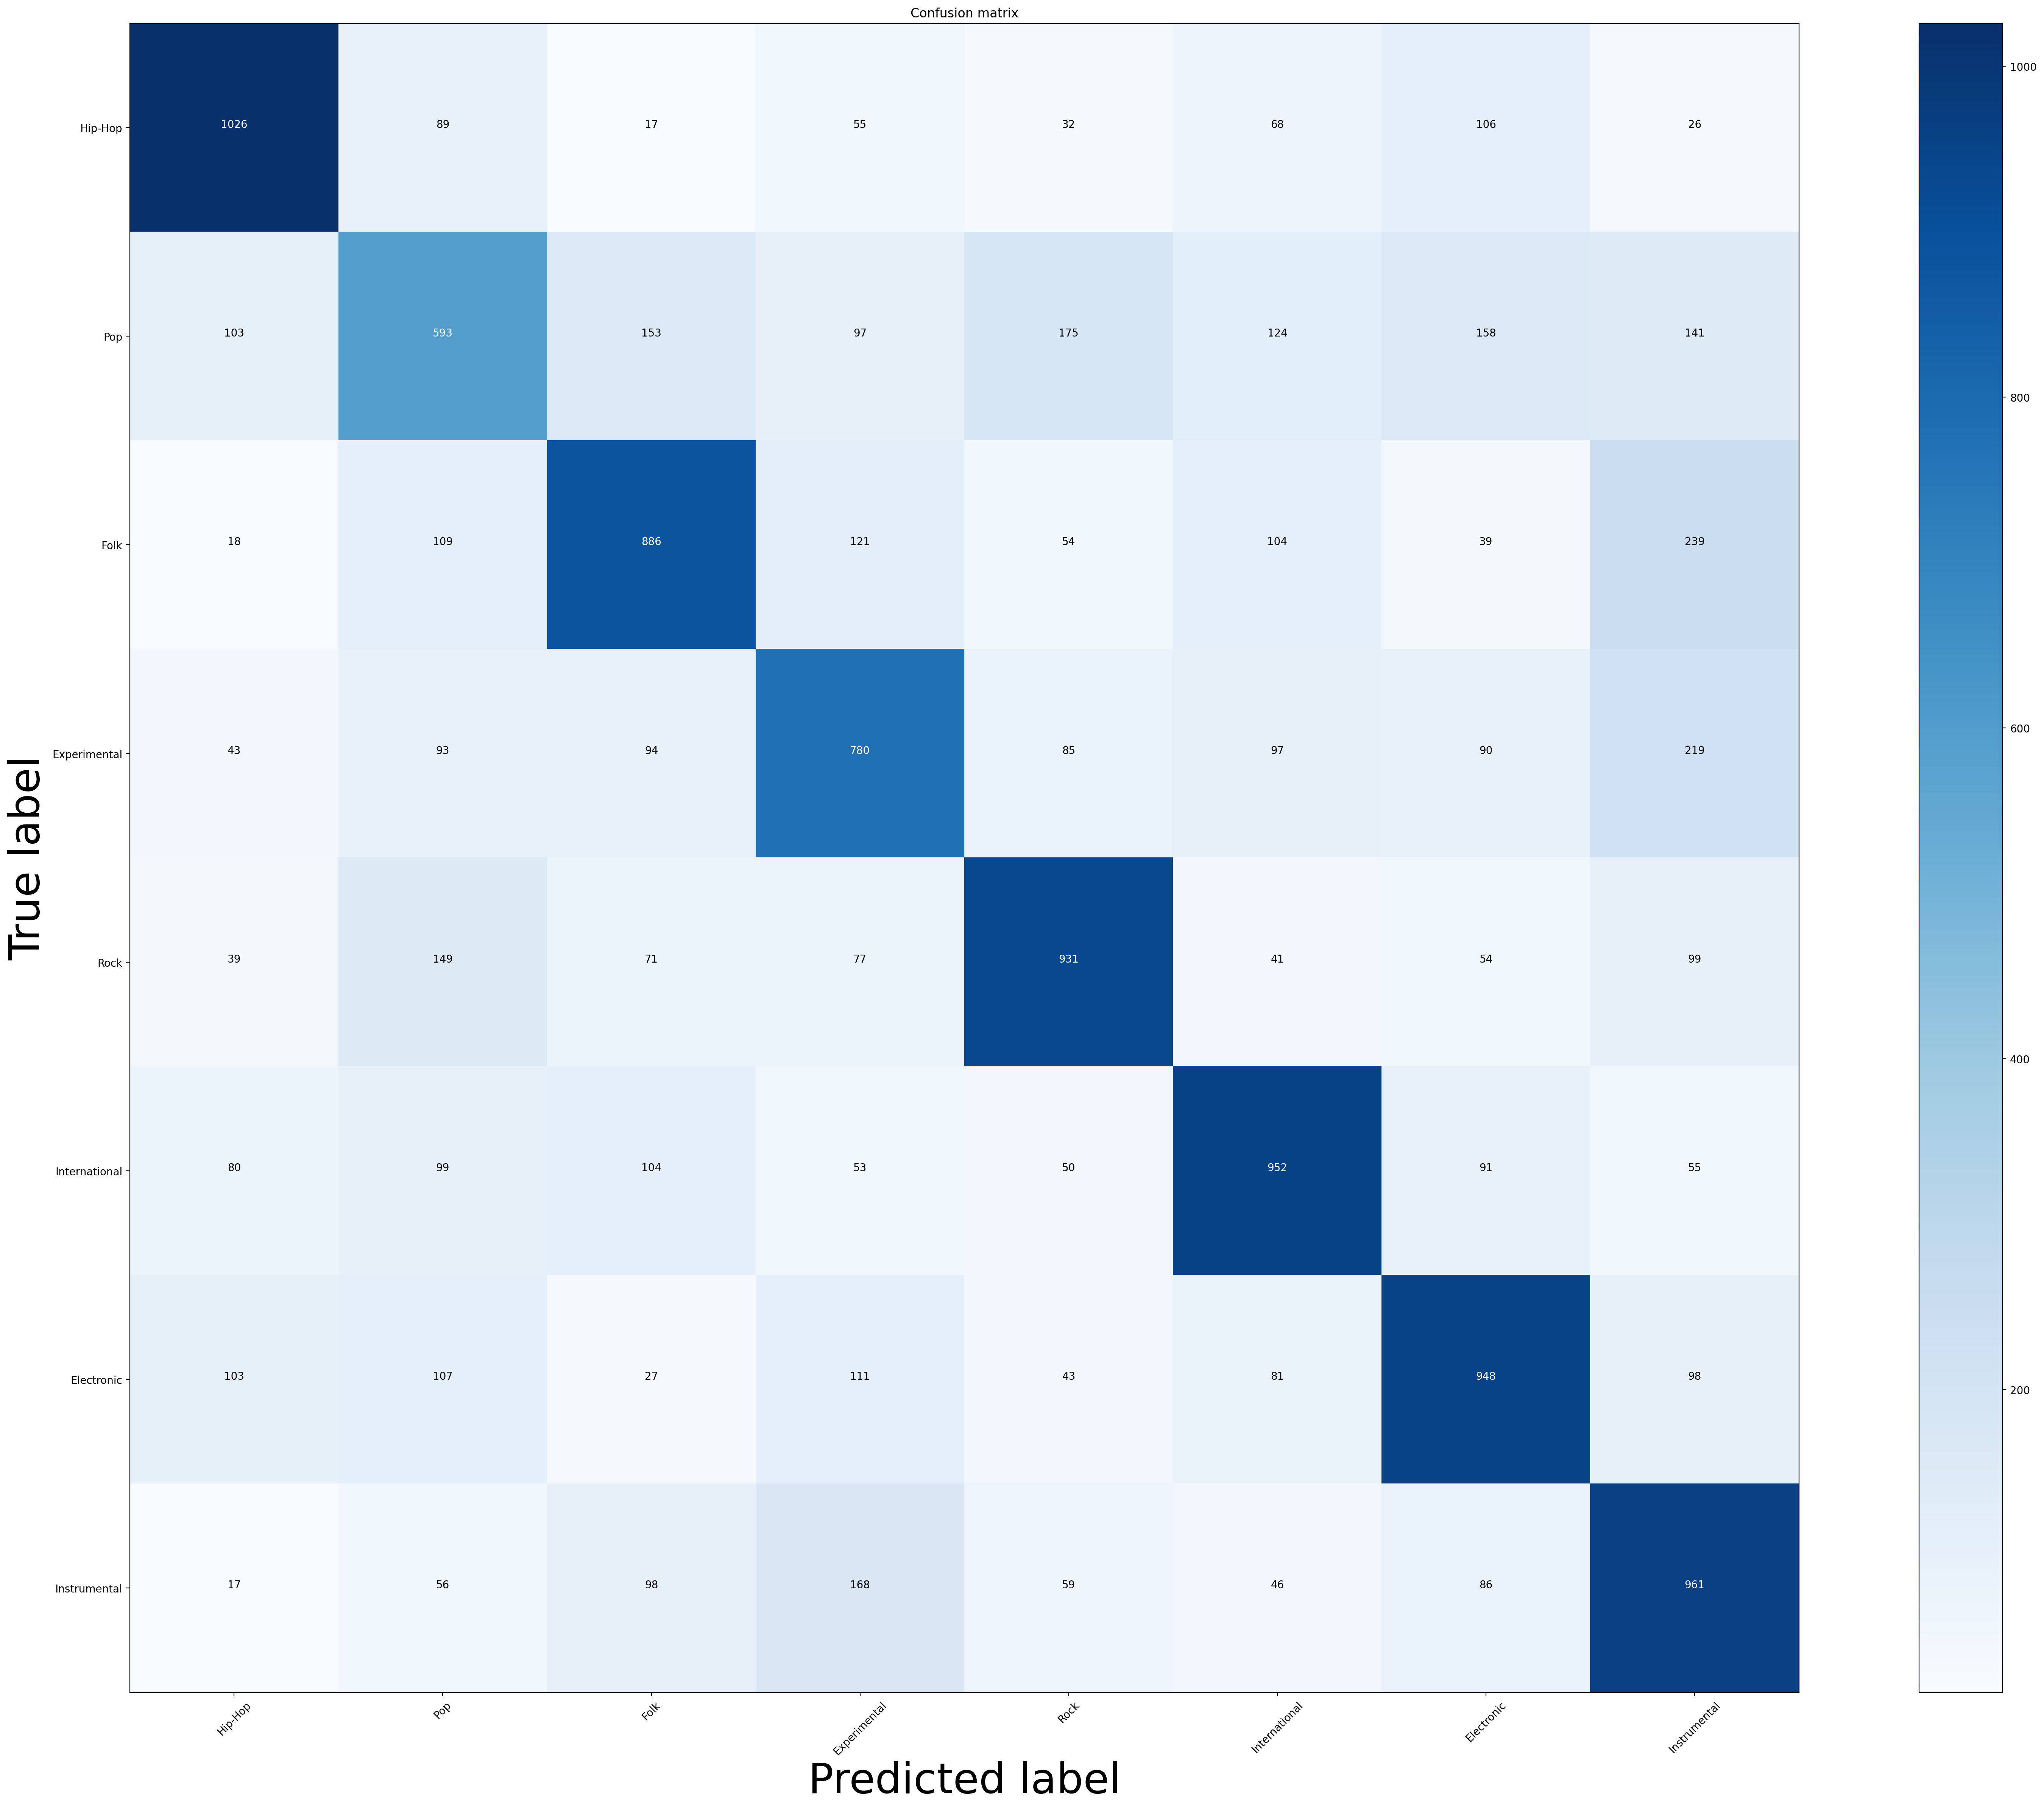

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_FMA_10.json"
classes = [
        "Hip-Hop",
        "Pop",
        "Folk",
        "Experimental",
        "Rock",
        "International",
        "Electronic",
        "Instrumental"]

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))  # True = s2s, False = s2v
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.LSTM(64, return_sequences=False))
    model.add(keras.layers.Dropout(0.2))


    # dense layer
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2])  # could be train, validation, test
    model = build_model(input_shape)
    

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)

    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix')
    plt.show()


# **LSTM** - **ARTISTS**

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_12.json"
classes = ["aerosmith", "beatles", "creedence_clearwater_revival", "cure", 
           "dave_matthews_band", "depeche_mode", "fleetwood_mac", "garth_brooks", 
           "green_day", "led_zeppelin", "madonna", "metallica", "prince", "queen",
           "radiohead", "roxette", "steely_dan", "suzanne_vega", "tori_amos", "u2" ]

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, fontsize=20, rotation=45)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))  # True = s2s, False = s2v
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.LSTM(64, return_sequences=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))


    # dense layer
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))

    # output
    model.add(keras.layers.Dense(20, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2])  # could be train, validation, test
    model = build_model(input_shape)
    

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)

    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix, without normalization')
    plt.show()


# **CNN**

In [0]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_10.json"


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array for each sample (what tensorflow expects for CNNs)
    X_train = X_train[..., np.newaxis]  # 4D array -> (num_samples, 130, 3, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):

    # create model
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # flatten the output
    model.add(keras.layers.Flatten())

    # feed a dense network
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(test_size=0.25, validation_size=0.2)

    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])  # could be train, validation, test
    model = build_model(input_shape)

    model.summary()

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)


# **CNN ARTISTS**

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_12.json"
classes = ["aerosmith", "beatles", "creedence_clearwater_revival", "cure", 
           "dave_matthews_band", "depeche_mode", "fleetwood_mac", "garth_brooks", 
           "green_day", "led_zeppelin", "madonna", "metallica", "prince", "queen",
           "radiohead", "roxette", "steely_dan", "suzanne_vega", "tori_amos", "u2" ]


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()


def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array for each sample (what tensorflow expects for CNNs)
    X_train = X_train[..., np.newaxis]  # 4D array -> (num_samples, 130, 3, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):

    # create model
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding="same"))
    model.add(keras.layers.BatchNormalization())

    # flatten the output
    model.add(keras.layers.Flatten())

    # feed a dense network
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(20, activation="softmax"))

    return model


def build_model_2(input_shape):

    # create model
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (8, 8), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((4, 4), padding="same"))
    # model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (8, 8), activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((4, 4), padding="same"))
    # model.add(keras.layers.BatchNormalization())

    # # 3rd conv layer
    # model.add(keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape))
    # model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding="same"))
    # model.add(keras.layers.BatchNormalization())

    # flatten the output
    model.add(keras.layers.Flatten())

    # feed a dense network
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(test_size=0.25, validation_size=0.2)

    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])  # could be train, validation, test
    model = build_model(input_shape)

    model.summary()

    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)

        # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix')
    plt.show()



# **CRNN** (experiments)

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_11.json"
classes = [
        "aerosmith",
        "beatles",
        "creedence_clearwater_revival",
        "cure",
        "dave_matthews_band",
        "depeche_mode",
        "fleetwood_mac",
        "garth_brooks",
        "green_day",
        "led_zeppelin",
        "madonna",
        "metallica",
        "prince",
        "queen",
        "radiohead",
        "roxette",
        "steely_dan",
        "suzanne_vega",
        "tori_amos",
        "u2"
    ]


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, fontsize=20, rotation=45)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array for each sample (what tensorflow expects for CNNs)
    X_train = X_train[..., np.newaxis]  # 4D array -> (num_samples, 130, 3, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    nb_layers = 3  # number of convolutional layers
    nb_filters = [64, 128, 128, 128]  # filter sizes
    kernel_size = (2, 2)  # convolution kernel size
    activation = 'relu'  # activation function to use after each layer
    pool_size = [(2, 2), (4, 2), (4, 2), (4, 2),
                 (4, 2)]  # size of pooling area
    
    frequency_axis = 2
    time_axis = 1
    channel_axis = 3

    # create model
    model = keras.Sequential()
    model.add(keras.layers.BatchNormalization(input_shape=input_shape))

    # layers
    model.add(keras.layers.Conv2D(nb_filters[0], kernel_size=kernel_size, padding='same',
                     data_format="channels_last",
                     input_shape=input_shape))  # True = s2s, False = s2v
    model.add(keras.layers.Activation(activation))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size[0], strides=pool_size[0]))
    model.add(keras.layers.Dropout(0.2))

    for layer in range(nb_layers - 1):
      # Convolutional layer
      model.add(keras.layers.Conv2D(nb_filters[layer + 1], kernel_size=kernel_size,
                      padding='same'))
      model.add(keras.layers.Activation(activation))
      model.add(keras.layers.BatchNormalization())  # Improves overfitting/underfitting
      model.add(keras.layers.MaxPooling2D(pool_size=pool_size[layer + 1],
                            strides=pool_size[layer + 1]))  # Max pooling
      model.add(keras.layers.Dropout(0.2))

    # Reshaping input for recurrent layer
    # (frequency, time, channels) --> (time, frequency, channel)
    model.add(keras.layers.Permute((time_axis, frequency_axis, channel_axis)))
    resize_shape = model.output_shape[2] * model.output_shape[3]
    model.add(keras.layers.Reshape((model.output_shape[1], resize_shape)))

    # recurrent layer
    model.add(keras.layers.GRU(32, return_sequences=True))
    model.add(keras.layers.GRU(32, return_sequences=False))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(20, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])  # could be train, validation, test
    model = build_model(input_shape)
    
    model.summary()
    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)

    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix, without normalization')
    plt.show()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_71 (Batc (None, 130, 13, 1)        4         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 130, 13, 64)       320       
_________________________________________________________________
activation_55 (Activation)   (None, 130, 13, 64)       0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 130, 13, 64)       256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 65, 6, 64)         0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 65, 6, 64)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 65, 6, 128)      

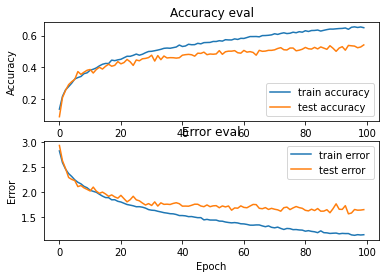

Confusion matrix, without normalization
[[ 48   2   1   3   2   1   6   0   0   1   1   0   0   7   2   1   2   0
    0   5]
 [ 10  66   3   8   2   4   5   3   3   3   0   3   3  12   3   2   1   0
    0   5]
 [  3   1  54   4   3   1   2   0   0  10   0   2   1   2   3   2   0   1
    1   0]
 [  5   1   0  65   2   3   2   1   3   0   2   3   1   4   5   2   0   1
    2   6]
 [  2   0   1   3  52   0   2   1   3   0  10   1   2   1   9  10   1   9
    4   1]
 [  2   2   0   3   0  72   3   0   1   0   1   1   5   6   3   1   0   3
    2   5]
 [  5   1   0   4   7   2  57   1   3   0   2   1   0   1   1   4   1   1
    4  11]
 [  1   7   2   2   0   3   1  76   0   1   0   0   1   4   5   1   0   3
    2   2]
 [  0   1   0   4   2   1   0   1 104   0   2   3   0   3   2   2   0   1
    0   1]
 [ 10  10   0   7   4   0   2   2   0  23   1   4   1   1   1   0   0   6
    0   3]
 [  2   1   0   5   5   6   4   2   0   0  45   1   2   3   6   8   2   6
   12   2]
 [  0   2   2   1   0   2

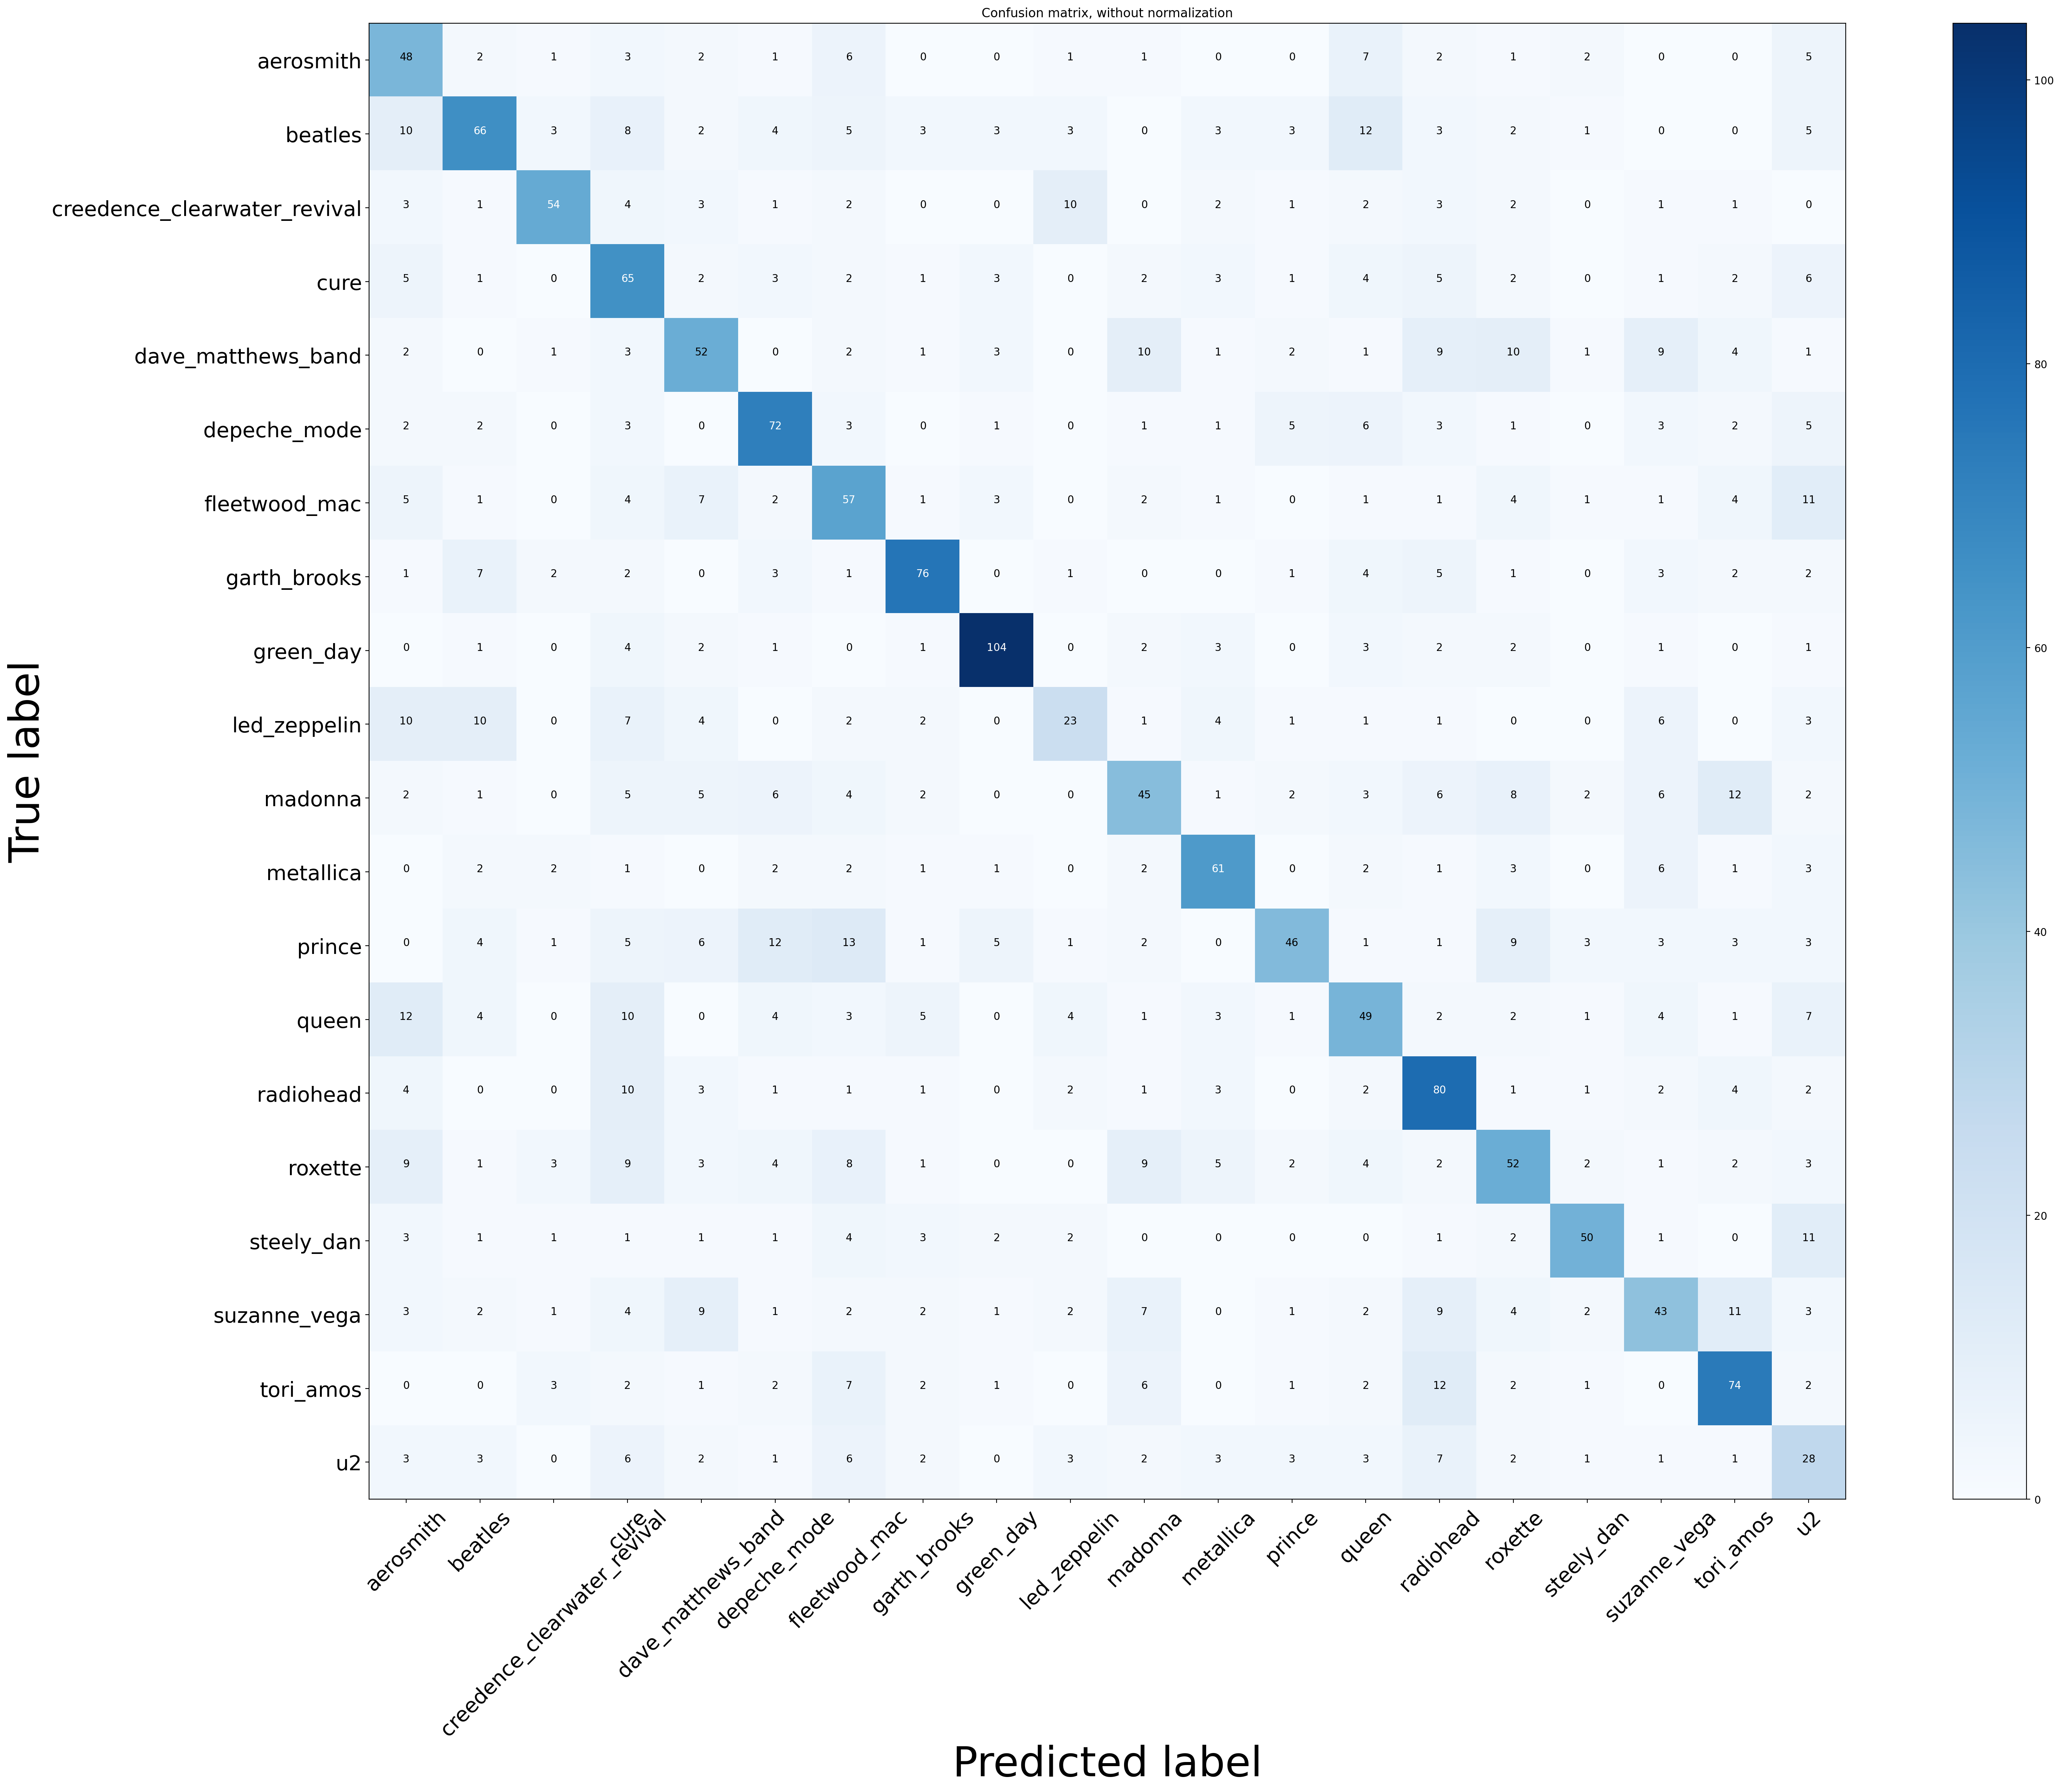

In [0]:
import json
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "drive/My Drive/data_11.json"
classes = [
        "aerosmith",
        "beatles",
        "creedence_clearwater_revival",
        "cure",
        "dave_matthews_band",
        "depeche_mode",
        "fleetwood_mac",
        "garth_brooks",
        "green_day",
        "led_zeppelin",
        "madonna",
        "metallica",
        "prince",
        "queen",
        "radiohead",
        "roxette",
        "steely_dan",
        "suzanne_vega",
        "tori_amos",
        "u2"
    ]


def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

        # convert lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, fontsize=20, rotation=45)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    plt.tight_layout()

def prepare_dataset(test_size, validation_size):
    # load data
    X, y = load_data(DATASET_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array for each sample (what tensorflow expects for CNNs)
    X_train = X_train[..., np.newaxis]  # 4D array -> (num_samples, 130, 3, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # RNN . LSTM model
    nb_layers = 2  # number of convolutional layers
    nb_filters = [64, 128, 128, 128]  # filter sizes
    kernel_size = (2, 2)  # convolution kernel size
    activation = 'relu'  # activation function to use after each layer
    pool_size = [(2, 2), (4, 2), (4, 2), (4, 2),
                 (4, 2)]  # size of pooling area
    
    frequency_axis = 2
    time_axis = 1
    channel_axis = 3

    # create model
    model = keras.Sequential()
    model.add(keras.layers.BatchNormalization(input_shape=input_shape))

    # layers
    model.add(keras.layers.Conv2D(nb_filters[0], kernel_size=kernel_size, padding='same',
                     data_format="channels_last",
                     input_shape=input_shape))  # True = s2s, False = s2v
    model.add(keras.layers.Activation(activation))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size[0], strides=pool_size[0]))
    model.add(keras.layers.Dropout(0.2))

    for layer in range(nb_layers - 1):
      # Convolutional layer
      model.add(keras.layers.Conv2D(nb_filters[layer + 1], kernel_size=kernel_size,
                      padding='same'))
      model.add(keras.layers.Activation(activation))
      model.add(keras.layers.BatchNormalization())  # Improves overfitting/underfitting
      model.add(keras.layers.MaxPooling2D(pool_size=pool_size[layer + 1],
                            strides=pool_size[layer + 1]))  # Max pooling
      model.add(keras.layers.Dropout(0.2))

    # Reshaping input for recurrent layer
    # (frequency, time, channels) --> (time, frequency, channel)
    model.add(keras.layers.Permute((time_axis, frequency_axis, channel_axis)))
    resize_shape = model.output_shape[2] * model.output_shape[3]
    model.add(keras.layers.Reshape((model.output_shape[1], resize_shape)))

    # recurrent layer
    model.add(keras.layers.GRU(32, return_sequences=True))
    model.add(keras.layers.GRU(32, return_sequences=False))
    model.add(keras.layers.Dropout(0.3))

    # output
    model.add(keras.layers.Dense(20, activation="softmax"))

    return model

def confusion(model, X, y):
    # X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    
    predicted = predicted_index
    actual = y

    return actual, predicted

def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extract index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    # predicted_class = classes[predicted_index]
    # actual_class = classes[y]

    print("The expected index is {}\nThe predicted index is {}".format(y, predicted_index))


if __name__ == "__main__":

    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_dataset(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])  # could be train, validation, test
    model = build_model(input_shape)
    
    model.summary()
    # compile the net
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)


    # evaluate the CNN on the testset
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on testset is: {}".format(test_accuracy))

    # stop the training if the validation score doesn't increase


    # make a prediction on a sample
    X = X_validation[10]
    y = y_validation[10]
    predict(model, X, y)

    # make a prediction on a sample
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # plot accuracy and error over epochs
    plot_history(history)

    # Compute confusion matrix
    
    actual, predicted = confusion(model, X_validation, y_validation)

    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(32, 24), dpi=200)
    plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix, without normalization')
    plt.show()


# Google Colab CPU/GPU info

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   37G   29G  56% /
tmpfs            64M     0   64M   0% /dev
tmpfs            13G     0   13G   0% /sys/fs/cgroup
shm              13G     0   13G   0% /dev/shm
tmpfs            13G   16K   13G   1% /var/colab
/dev/sda1        75G   38G   37G  51% /opt/bin
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware
drive           100G   23G   78G  23% /content/drive


In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [0]:
!cat /proc/meminfo

MemTotal:       26751700 kB
MemFree:         2748180 kB
MemAvailable:   22800856 kB
Buffers:           28036 kB
Cached:          2192076 kB
SwapCached:            0 kB
Active:          3902740 kB
Inactive:       19632448 kB
Active(anon):    3214652 kB
Inactive(anon):     5460 kB
Active(file):     688088 kB
Inactive(file): 19626988 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               744 kB
Writeback:             0 kB
AnonPages:      21315016 kB
Mapped:           846712 kB
Shmem:              6060 kB
Slab:             187312 kB
SReclaimable:     121988 kB
SUnreclaim:        65324 kB
KernelStack:        5312 kB
PageTables:        59816 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375848 kB
Committed_AS:   29193192 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1872 kB
AnonHugePages:   